In [11]:
import numpy as np
import matplotlib.pyplot  as plt

try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle

In [12]:
with open('un0rick_50v/un0rick.pkl', 'rb') as fp:
    un0rick = pickle.load(fp)

with open('lit3rick_5v/lit3rick.pkl', 'rb') as fp:
    lit3rick = pickle.load(fp)

print(un0rick.keys(),"\n\n",lit3rick.keys())

dict_keys([500, 't', 0, 100, 200, 300, 400, 600, 700, 800, 900, 1000]) 

 dict_keys(['t', (0, 0), (0, 50), (0, 100), (0, 150), (0, 200), (0, 250), (0, 300), (0, 350), (0, 400), (0, 450), (0, 500), (1, 0), (1, 50), (1, 100), (1, 150), (1, 200), (1, 250), (1, 300), (1, 350), (1, 400), (1, 450), (1, 500)])


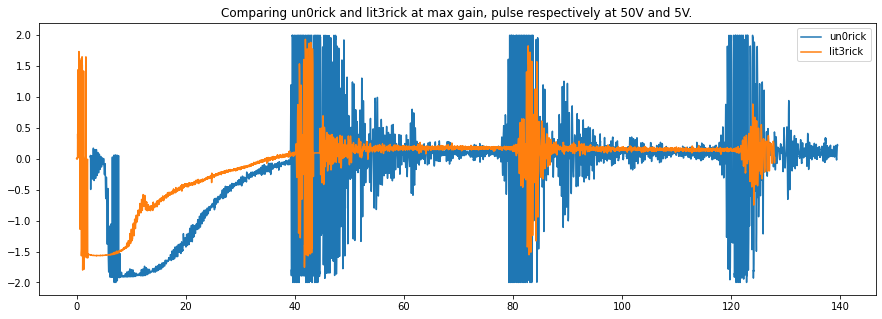

In [26]:
plt.figure(figsize=(15,5))
plt.plot(un0rick["t"],un0rick[1000],label="un0rick")
plt.plot(lit3rick["t"],lit3rick[(1,500)],label="lit3rick")
plt.title("Comparing un0rick and lit3rick at max gain, pulse respectively at 50V and 5V.")
plt.legend()
plt.savefig("compare_maxgain.jpg")
plt.show()

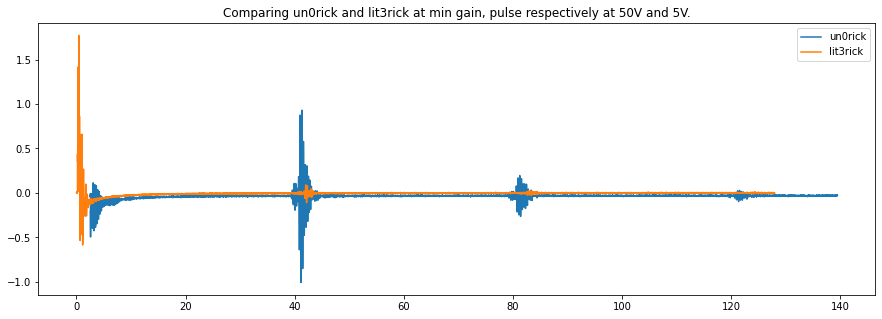

In [25]:
plt.figure(figsize=(15,5))
plt.plot(un0rick["t"],un0rick[0],label="un0rick")
plt.plot(lit3rick["t"],lit3rick[(1,0)],label="lit3rick")
plt.title("Comparing un0rick and lit3rick at min gain, pulse respectively at 50V and 5V.")
plt.legend()
plt.savefig("compare_mingain.jpg")
plt.show()

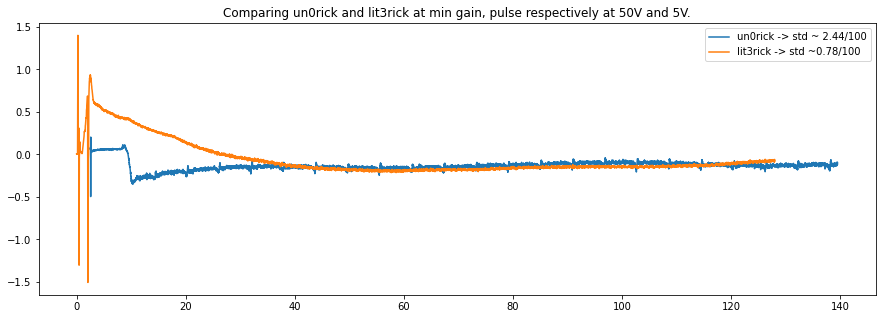

In [43]:
Nu = int(10000*np.std(un0rick["noise"][-100:]))/100
Nl = int(10000*np.std(lit3rick["noise"][-100:]))/100
plt.figure(figsize=(15,5))
plt.plot(un0rick["t"],un0rick["noise"],label="un0rick -> std ~ "+str(Nu)+"/100")
plt.plot(lit3rick["t"],lit3rick["noise"],label="lit3rick -> std ~"+str(Nl)+"/100")
plt.title("Comparing un0rick and lit3rick at min gain, pulse respectively at 50V and 5V.")
plt.legend()
plt.savefig("compare_noise.jpg")
plt.show()